<a href="https://colab.research.google.com/github/leiyi-ihb/ColabPractics/blob/main/KerasFramework/Keras_functionalAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://zhuanlan.zhihu.com/p/53933876
'''
这里进一步使用Keras的函数式API方式进行深度学习模型创建练习。
序贯(sequential)API允许你为大多数问题逐层堆叠创建模型。虽然说对很多的应用来说，这样的一个手法很简单也解决了很多深度学习网络结构的构建，但是它也有限制－它不允许你创建模型有共享层或有多个输入或输出的网络。
Keras中的函数式(functioanal)API是创建网络模型的另一种方式，它提供了更多的灵活性，包括创建更复杂的模型。
这篇文章的相关范例，你将知道：
1、Sequential和Functional API之间的区别。
2、如何使用功能性(functional)API定义简单的多层感知器(MLP),卷积神经网络(CNN)和递归神经网络(RNN)模型。
3、如何用共享层和多个输入输出来定义更复杂模型
'''
# 当前使用的环境
import platform
import tensorflow
import keras

print("Platform:{}".format(platform.platform()))
print("Tensorflow version:{}".format(tensorflow.__version__))
print("Keras version:{}".format(keras.__version__))
# Platform:Linux-4.15.0-43-generic-x86_64-with-debian-buster-sid
# Tensorflow version:1.12.0
# Keras version:2.2.4
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image

Platform:Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic
Tensorflow version:2.9.2
Keras version:2.9.0


In [2]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model

mnist_input = Input(shape=(784,)) #输入
hidden = Dense(512)(mnist_input) #输出

model = Model(inputs=mnist_input,outputs=hidden)

# 3.1 多层感知器（multilayer Perceptron）【区分原始感知器】  
让我们来定义一个多类别分类（multi-class classification）的多层感知器(MPL)模型。该模型有784个输入，3个隐藏层（512，216和128个隐藏神经元），输出层有10个输出。在每个隐藏层中使用relu激活函数，并且在输出层中使用maftmax激活函数进行多类别分类。

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 hidden1 (Dense)             (None, 512)               401920    
                                                                 
 hidden2 (Dense)             (None, 216)               110808    
                                                                 
 hidden3 (Dense)             (None, 128)               27776     
                                                                 
 output (Dense)              (None, 100)               12900     
                                                                 
Total params: 553,404
Trainable params: 553,404
Non-trainable params: 0
_________________________________________________________________
None


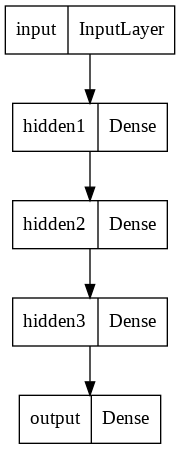

In [3]:
from os import name
# 多层感知器MLP模型
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import plot_model

import matplotlib.pyplot as plt
from IPython.display import Image

# 创建网络
mnist_input = Input(shape=(784,), name='input')
hidden1 = Dense(512, activation='relu', name='hidden1')(mnist_input)
hidden2 = Dense(216, activation='relu', name='hidden2')(hidden1)
hidden3 = Dense(128, activation='relu', name='hidden3')(hidden2)
output = Dense(100, activation='softmax', name='output')(hidden3)


model = Model(inputs=mnist_input, outputs=output)

#打印网络结构
print(model.summary())

# 产生网络拓扑图
plot_model(model, to_file='multilayer_perceptron_graph.png')
Image('multilayer_perceptron_graph.png')


#卷积神经网络(CNN)
我们将定义一个用于图像分类的卷积神经网络(Convolutional neural network)。
该模型接收`灰阶的28 * 28`图像作为输入，然后有一个作为特征提取器的两个卷积和池化层的序列，然后是一个完全连接层来解释特征，并且具有用于**10类**预测的softmax激活的输出层。

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 28, 28, 1)]       0         
                                                                 
 cov2d_1 (Conv2D)            (None, 25, 25, 128)       2176      
                                                                 
 pool1 (MaxPooling2D)        (None, 12, 12, 128)       0         
                                                                 
 cov2d_2 (Conv2D)            (None, 9, 9, 64)          131136    
                                                                 
 pool2 (MaxPooling2D)        (None, 4, 4, 64)          0         
                                                                 
 output (Dense)              (None, 4, 4, 10)          650       
                                                                 
Total params: 133,962
Trainable params: 133,962
Non-trainab

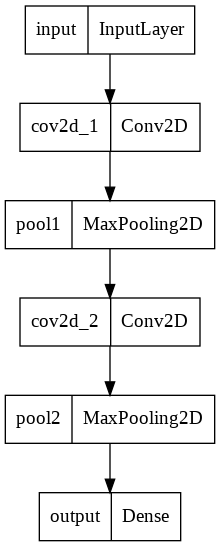

In [7]:
from keras.layers.pooling.max_pooling2d import MaxPooling2D
from keras.models import Model
from keras.layers import Conv2D, Dense, MaxPool2D
from keras.utils import plot_model

# 创建网络
mnist_input = Input(shape=(28, 28, 1), name='input')
cov2d_1 = Conv2D(128, kernel_size=4, activation='relu', name='cov2d_1')(mnist_input)
pool1 = MaxPooling2D(pool_size=(2,2), name='pool1')(cov2d_1)
cov2d_2 = Conv2D(64, kernel_size=4, activation='relu', name='cov2d_2')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2), name='pool2')(cov2d_2)
output = Dense(10, activation='softmax', name='output')(pool2)

model = Model(inputs=mnist_input, outputs=output)

# 打印网络结构
print(model.summary())

# 打印结构图
plot_model(model, to_file='convolutional_neural_network.png')
Image('convolutional_neural_network.png') #ValueError: Cannot embed the 'pdf' image format



# 递归神经网络(RNN)
我们将定义一个长短期记忆(LSTM)递归神经网络用于图像分类。该模型预期一个特征的784个时间步骤作为输入。该模型具有单个LSTM隐藏层以从序列中提取特征，接着是完全连接的层来解释LSTM输出，接着是用于进行10类别预测的输出层。

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784, 1)]          0         
                                                                 
 lstm (LSTM)                 (None, 392)               617792    
                                                                 
 dense1 (Dense)              (None, 392)               154056    
                                                                 
 dense2 (Dense)              (None, 10)                3930      
                                                                 
Total params: 775,778
Trainable params: 775,778
Non-trainable params: 0
_________________________________________________________________
None


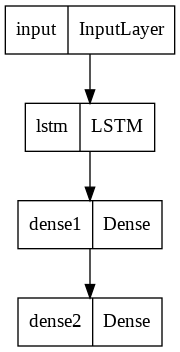

In [11]:
from ast import Mod
from keras.models import Model
from keras.layers import Dense, LSTM, Input
from keras.utils import plot_model
import matplotlib.pyplot as plt
from IPython.display import Image

# 创建网络
input = Input(shape=(784, 1), name='input')
lstm = LSTM(392, activation='relu', name='lstm')(input)
dense_1 = Dense(392, activation='relu', name='dense1')(lstm)
output = Dense(10, activation='softmax', name='dense2')(dense_1)

model = Model(inputs=input, outputs=output)

# 打印网络机构
print(model.summary())

# 打印结构图
plot_model(model, to_file='recurrent_neural_network.png')
Image('recurrent_neural_network.png')


# 共享层模型
多个神经层可以共享一个神经层的输出来当成输入。例如，一个输入可能可以有多个不同的特征提取层，或者多个神经层用于解释特征提取层的输出。我们来看下面两个例子。

##共享输入层(Shared Input Layer)
我们定义具有`不同大小的内核`的多个卷积层来解释图像输入。该模型使用28 × 28像素的`灰阶`图像。有两个CNN特征提取子模型`共享这个输入`:第一个具有４的内核大小和第二个８的内核大小。这些特征提取子模型的输出被平坦化(flatten)为向量(vector),并且被串成一个长向量；然后被传递到完全连接的层以用于最终输出层之前进行10类别预测。

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv1 (Conv2D)                 (None, 25, 25, 32)   544         ['input[0][0]']                  
                                                                                                  
 conv2 (Conv2D)                 (None, 21, 21, 32)   2080        ['input[0][0]']                  
                                                                                                  
 pool1 (MaxPooling2D)           (None, 12, 12, 32)   0           ['conv1[0][0]']                  
                                                                                            

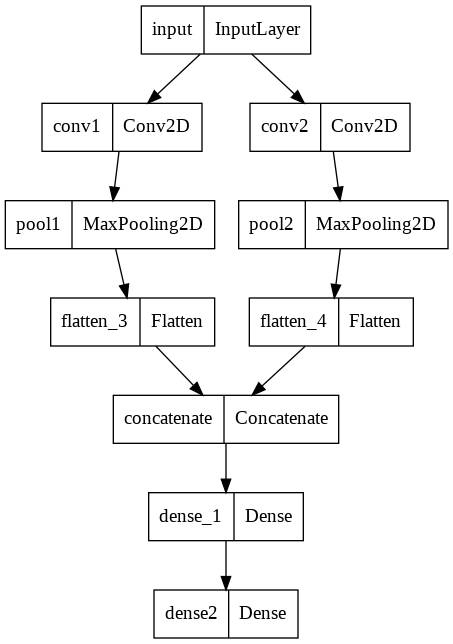

In [14]:
from keras.models import Model
from keras.layers import Input, Conv2D, Flatten, Dense, MaxPool2D, concatenate
from keras.utils import plot_model
import matplotlib.pyplot as plt
from IPython.display import Image


# 创建网络
mnist_input = Input((28,28,1), name='input')
# 第一个特征提取层
conv1 = Conv2D(32,kernel_size=4,activation='relu',name='conv1')(mnist_input) # <- 看这里
pool1 = MaxPool2D(pool_size=(2,2),name='pool1')(conv1)
flat1 = Flatten()(pool1)
# 第二个特征提取层
conv2 = Conv2D(32, kernel_size=8, activation='relu', name='conv2')(mnist_input) # <- 看这里
pool2 = MaxPool2D(pool_size=(2, 2), name='pool2')(conv2)
flat2 = Flatten()(pool2)
# 把这两个特征提取层的结果拼接起来
merge = concatenate([flat1,flat2])

# 进行全连接层
dense1 = Dense(64, activation='relu', name='dense_1')(merge)
# 进行输出层
output = Dense(10, activation='softmax', name='dense2')(dense1)

# 以model来组合整个网络
model = Model(inputs=mnist_input, outputs=output)

# 打印网络结构
print(model.summary())
# 打印结构图
plot_model(model, to_file='shared_input_layer.png')
Image('shared_input_layer.png')



# 共享特征提取层(Shared Feature Extraction Layer)
我们将使用两个并行子模型来解释用于序列分类的LSTM特征提取器的输出。该模型的输入是一个特征的**784**个时间步长。具有**10**个存储单元的LSTM层解释这个序列。第一种解释模型是浅层单连通层，第二层是深层３层模型。两个解释模型的输出**连接成一个长向量**，传递给用于进行10类别分类预测的输出层。

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 784, 1)]     0           []                               
                                                                                                  
 lstm1 (LSTM)                   (None, 10)           480         ['input[0][0]']                  
                                                                                                  
 interp2_1 (Dense)              (None, 64)           704         ['lstm1[0][0]']                  
                                                                                                  
 interp2_2 (Dense)              (None, 32)           2080        ['interp2_1[0][0]']              
                                                                                            

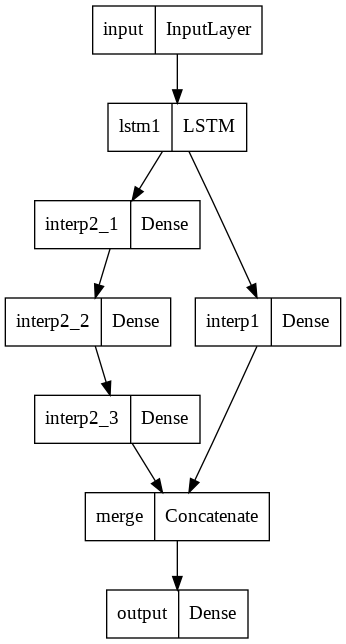

In [18]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, concatenate
from keras.utils import plot_model

# 创建网络
mnist_input = Input(shape=(784,1), name='input')
# 特征提取层
extract1 = LSTM(128, activation='relu', name='lstm1')(mnist_input)

# 第一个解释层（浅层单连通层）
interp1 = Dense(10,activation='relu',name='interp1')(extract1) # <- 看这里
# 第二个解释层(深层3层模型)
interp2_1 = Dense(64,activation='relu',name='interp2_1')(extract1) # <- 看这里
interp2_2 = Dense(32,activation='relu',name='interp2_2')(interp2_1)
interp2_3 = Dense(10,activation='relu',name='interp2_3')(interp2_2)

# 把两个特征提取层的结果拼起来
merge = concatenate([interp1,interp2_3],name='merge')

# 输出层
output = Dense(10,activation='softmax',name='output')(merge)

# 以Ｍodel来组合整个网络
model = Model(inputs=mnist_input,outputs=output)

# 打印网络结构
model.summary()

# 可视化
plot_model(model,to_file='shared_feature_extractor.png')

# 秀出网络拓补图
Image('shared_feature_extractor.png')

# 多种输入和输出模型
函数式(functional)API也可用于开发具有多个输入或多个输出的更复杂的模型。

## 多输入模型
我们将开发一个图像分类模型，将图像的两个版本作为输入，每个图像的大小不同,分别是一个`灰阶的64 * 64版本`和一个`32 * 32 彩色版本`。分离的特征提取CNN模型对每个模型进行操作，然后将两个模型的结果连接起来进行解释和最终的预测。*请注意在创建Model()实例(instance)时，我们将两个输入层定义为一个数组(array)*

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img_gray_bigsize (InputLayer)  [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 img_rgb_bigsize (InputLayer)   [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv11 (Conv2D)                (None, 61, 61, 32)   544         ['img_gray_bigsize[0][0]']       
                                                                                                  
 conv21 (Conv2D)                (None, 29, 29, 32)   1568        ['img_rgb_bigsize[0][0]']        
                                                                                           

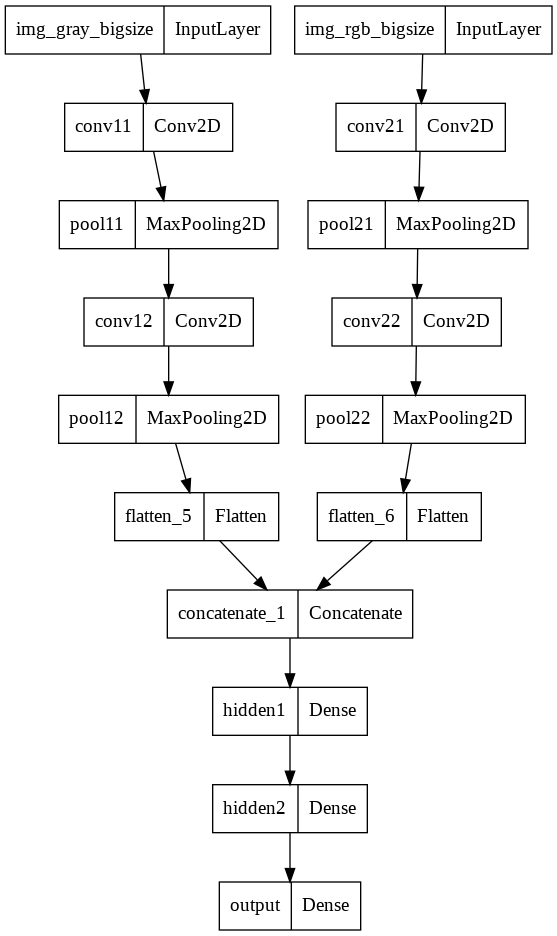

In [19]:
from threading import active_count
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten
from keras.utils import plot_model

# 创建模型
# 第一个输入层
img_gray_bigsize = Input(shape=(64,64,1),name='img_gray_bigsize')
conv11 = Conv2D(32,kernel_size=4,activation='relu',name='conv11')(img_gray_bigsize)
pool11 = MaxPool2D(pool_size=(2,2),name='pool11')(conv11)
conv12 = Conv2D(16,kernel_size=4,activation='relu',name='conv12')(pool11)
pool12 = MaxPool2D(pool_size=(2,2),name='pool12')(conv12)
flat1 = Flatten()(pool12)

# 第二个输入层
img_rgb_smallsize = Input(shape=(32,32,3),name='img_rgb_bigsize')
conv21 = Conv2D(32,kernel_size=4,activation='relu',name='conv21')(img_rgb_smallsize)
pool21 = MaxPool2D(pool_size=(2,2),name='pool21')(conv21)
conv22 = Conv2D(16,kernel_size=4,activation='relu',name='conv22')(pool21)
pool22 = MaxPool2D(pool_size=(2,2),name='pool22')(conv22)
flat2 = Flatten()(pool22)

# 把两个特征提取层的结果拼起来
merge = concatenate([flat1,flat2])

# 用隐藏的全连接层来解释特征
hidden1 = Dense(128,activation='relu',name='hidden1')(merge)
hidden2 = Dense(64,activation='relu',name='hidden2')(hidden1)

# 输出层
output = Dense(10,activation='softmax',name='output')(hidden2)
# 以Model来组合整个网络
model = Model(inputs=[img_gray_bigsize,img_rgb_smallsize],outputs=output) #注意传参方式

# 打印网络结构
model.summary()

# 可视化
plot_model(model,to_file='multiple_inputs.png')

# 秀出网络拓补图
Image('multiple_inputs.png')

# 多输出模型
我们将开发一个模型，进行两种不同模型的预测。给定一个特征的784个时间步长的输入序列，该模型将对该序列进行分类并输出具有相同长度的新序列。LSTM层解释输入序列并返回每个时间步长的隐藏状态。第一个输出模型创建一个堆叠的LSTM，解释这些特征，并进行多类别预测。第二个输出模型使用相同的输出层对每个输入时间步进行多类别预测。

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 784, 1)]     0           []                               
                                                                                                  
 extract (LSTM)                 (None, 784, 64)      16896       ['input[0][0]']                  
                                                                                                  
 class11 (LSTM)                 (None, 32)           12416       ['extract[0][0]']                
                                                                                                  
 class12 (Dense)                (None, 32)           1056        ['class11[0][0]']                
                                                                                           

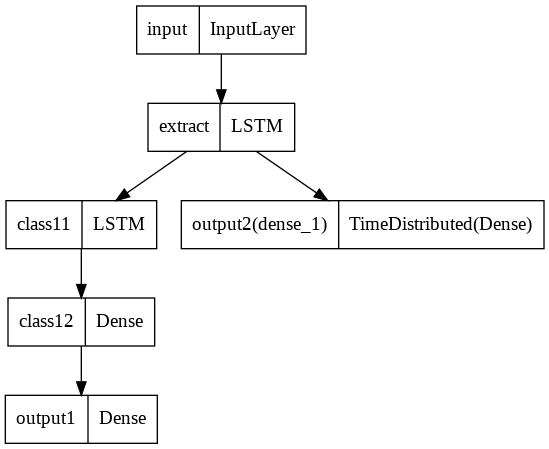

In [20]:
# 多输出模型
from keras.models import Model
from keras.layers import Input, Dense, LSTM, TimeDistributed
from keras.utils import plot_model

# 输入层
mnist_input = Input(shape=(784,1),name='input') # 把每一个像素想成是一序列有前后关系的time_steps

# 特征提取层
extract = LSTM(64,return_sequences=True,name='extract')(mnist_input)

# 分类输出
class11 = LSTM(32,name='class11')(extract)
class12 = Dense(32,activation='relu',name='class12')(class11)
output1 = Dense(10,activation='softmax',name='output1')(class12)

# 序列输出
output2 = TimeDistributed(Dense(10,activation='softmax'),name='output2')(extract)

# 以Model来组合整个网络
model = Model(inputs=mnist_input,outputs=[output1,output2])

# 打印网络结构
model.summary()

# plot_model可视化
plot_model(model,to_file='multiple_outputs.png')
# 秀出拓补图
Image('multiple_outputs.png')